In [1]:
import sys
import os
import Plotting as plot
sys.path.append(os.getcwd())
from quantileRegression import quantileRegression, setupJoblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib inline
#reload(plt)
plt.style.use('seaborn-talk')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,8)
import copy as cp



Welcome to ROOTaaS 6.06/08


In [2]:
# Variable you want to correct
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi",'CovarianceIetaIphi']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
n_jobs=30
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [9]:
# Upload Dataframes:
qr_mc1= quantileRegression("mc")
qr_mc2= quantileRegression("mc")
qr_data= quantileRegression("data")
qr_mc1.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5", 0, -1)
qr_mc2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5", 0, -1)
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Final.h5", 0, 500000)

Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5
Selecting events   [ 0 ,  9554789 ]  out of  9554789
number of events: 9554789
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5
Selecting events   [ 0 ,  9554789 ]  out of  9554789
number of events: 9554789
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Final.h5
Selecting events   [ 0 ,  500000 ]  out of  21216525
number of events: 500000


In [10]:
qr_mc1.df = qr_mc1.df.sample(n=500000).reset_index(drop=True)
qr_mc2.df = qr_mc2.df.sample(n=500000).reset_index(drop=True)
print len(qr_mc1.df.index)
qr_mc1.correctAll(X, ylist, quantiles,EBEE="EB", relativePath= "weights_Period_") 
qr_mc2.correctAll(X, ylist, quantiles,EBEE="EE", relativePath= "weights_Period_")
dfmc1= qr_mc1.getDF() 
dfmc2= qr_mc2.getDF() 
frame2 = [dfmc1, dfmc2] 
data2 = pd.concat(frame2) 
qr_mc= quantileRegression("mc")
qr_mc.df = data2.sample(frac=1).reset_index(drop=True)

500000
Corrected variables file (e.g.  correctedTargetsweights_Period_1_EB.h5  ) does not exists. This will take a while...
Correct EB :
-1.4442  <  ScEta  and  ScEta  <  1.4442
Loading mc weights for  R9  : 
    ./weights/weights_Period_1/mc_weights_EB
Loading data weights for  R9
    ./weights/weights_Period_1/data_weights_EB
Get corrections for  R9  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  R9
Loading mc weights for  S4  : 
    ./weights/weights_Period_1/mc_weights_EB
Loading data weights for  S4
    ./weights/weights_Period_1/data_weights_EB
Get corrections for  S4  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  S4
Loading mc weights for  SigmaIeIe  : 
    ./weights/weights_Period_1/mc_weights_EB
Loading data weights for  SigmaIeIe
    ./weights/weights_Period_1/data_weights_EB
Loading mc weights for  EtaWidth  : 
    ./weights/weigh

In [24]:
#%time qr_mc.correctPhoIso("../phoIsoStoch/corrections_hybrid.root",n_jobs=n_jobs)
# qr_mc.df["PhoIso03_corr"]=qr_mc.df["PhoIso03"]


In [12]:
showerShapes = ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4',"CovarianceIphiIphi"]

mvas = [ ("moriondPhoID",dict(correct=[], rhoSubtraction=True) ), 
         ("moriondPhoIDcorrShowerShapes",dict(correct=showerShapes, rhoSubtraction=True) ) ]# ,
##("moriondPhoIDcorrIso",dict(correct=['PhoIso03'],rhoSubtraction=True)),
#("moriondPhoIDcorrAll",dict(correct=showerShapes+['PhoIso03'], rhoSubtraction=True))]

weights = ("./phoIDMVAweights/HggPhoId_barrel_Moriond2017_wRhoRew.weights.xml","./phoIDMVAweights/HggPhoId_endcap_Moriond2017_wRhoRew.weights.xml")

In [13]:
%time qr_data.computeIdMvas( mvas[:1],  weights, n_jobs=n_jobs )
%time qr_mc.computeIdMvas( mvas, weights, n_jobs=n_jobs )
dfmc = qr_mc.getDF()
dfdata = qr_data.getDF()

Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   20.6s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   21.0s remaining:  5.1min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   21.1s remaining:  2.4min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   21.4s remaining:  1.5min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   22.1s remaining:  1.1min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   22.5s remaining:   47.3s
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   22.8s remaining:   36.2s
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:   23.0s remaining:   27.9s
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:   23.4s remaining:   22.0s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:   23.9s remaining:   17.3s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:   24.8s remaining:   13.7s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:   25.4s remaining:   10.4s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 0 ns, sys: 15 s, total: 15 s
Wall time: 45.6 s
Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   16.2s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   16.2s remaining:  3.9min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   16.6s remaining:  1.9min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   17.3s remaining:  1.2min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   17.7s remaining:   50.8s
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   20.3s remaining:   42.5s
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   23.0s remaining:   36.5s
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:   23.5s remaining:   28.5s
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:   23.7s remaining:   22.2s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:   23.9s remaining:   17.3s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:   24.2s remaining:   13.3s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:   24.2s remaining:    9.9s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

Computing moriondPhoIDcorrShowerShapes, correcting {'rhoSubtraction': True, 'correct': ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4', 'CovarianceIphiIphi']}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   21.7s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   23.4s remaining:  5.6min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   25.8s remaining:  2.9min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   26.0s remaining:  1.8min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   26.1s remaining:  1.3min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   26.3s remaining:   55.2s
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   26.4s remaining:   41.8s
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:   26.4s remaining:   32.1s
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:   26.5s remaining:   24.8s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:   28.0s remaining:   20.2s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:   29.4s remaining:   16.2s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:   29.8s remaining:   12.2s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 58.4 s
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside


In [14]:
dfEB   = dfdata  .query('(-1.444 < ScEta and ScEta <1.444) and (mass > 70 and mass < 110)  and (ChIso03 < 5)') 
dfEE   = dfdata  .query('(ScEta < -1.57 or ScEta >1.57)  and (mass > 70 and mass < 110)  and (ChIso03 < 5) and (R9>0.8)')
dfmcEB   = dfmc  .query('(-1.444 < ScEta and ScEta <1.444)  and (mass > 70 and mass < 110) and (ChIso03 < 5)') 
dfmcEE   = dfmc  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110)  and (ChIso03 < 5) and (R9>0.8)')

Plotting.py:52: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if axes == None: axes = fig.axes


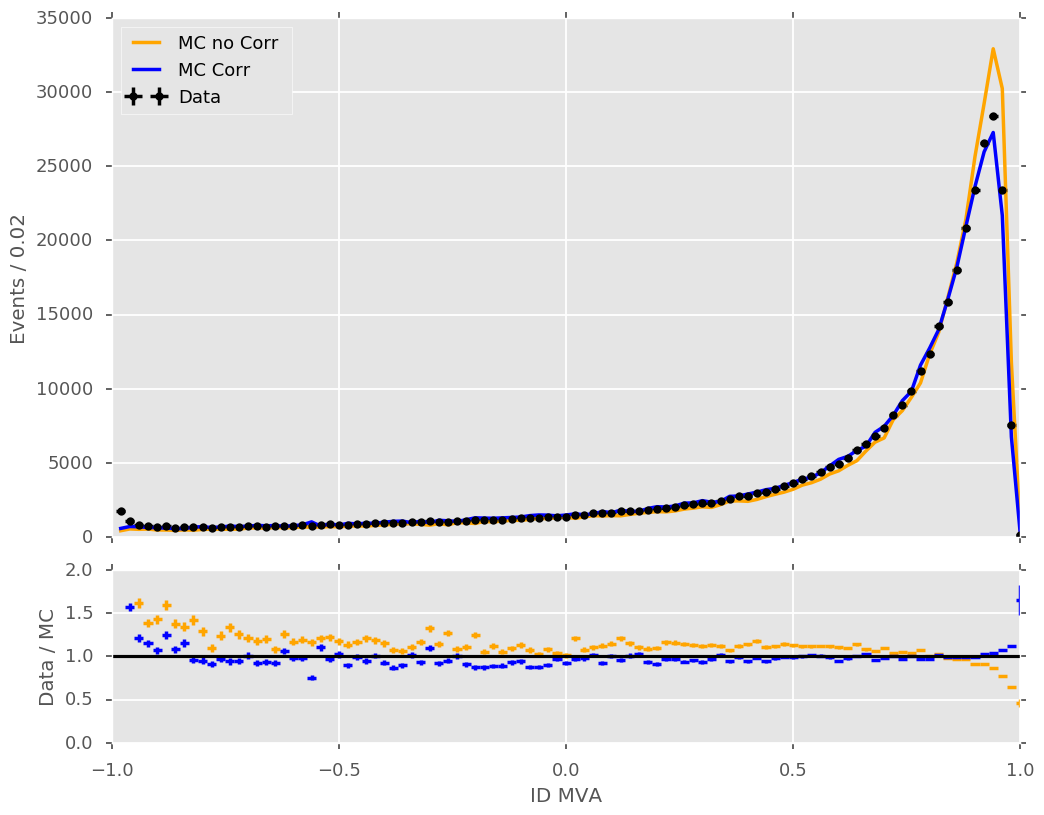

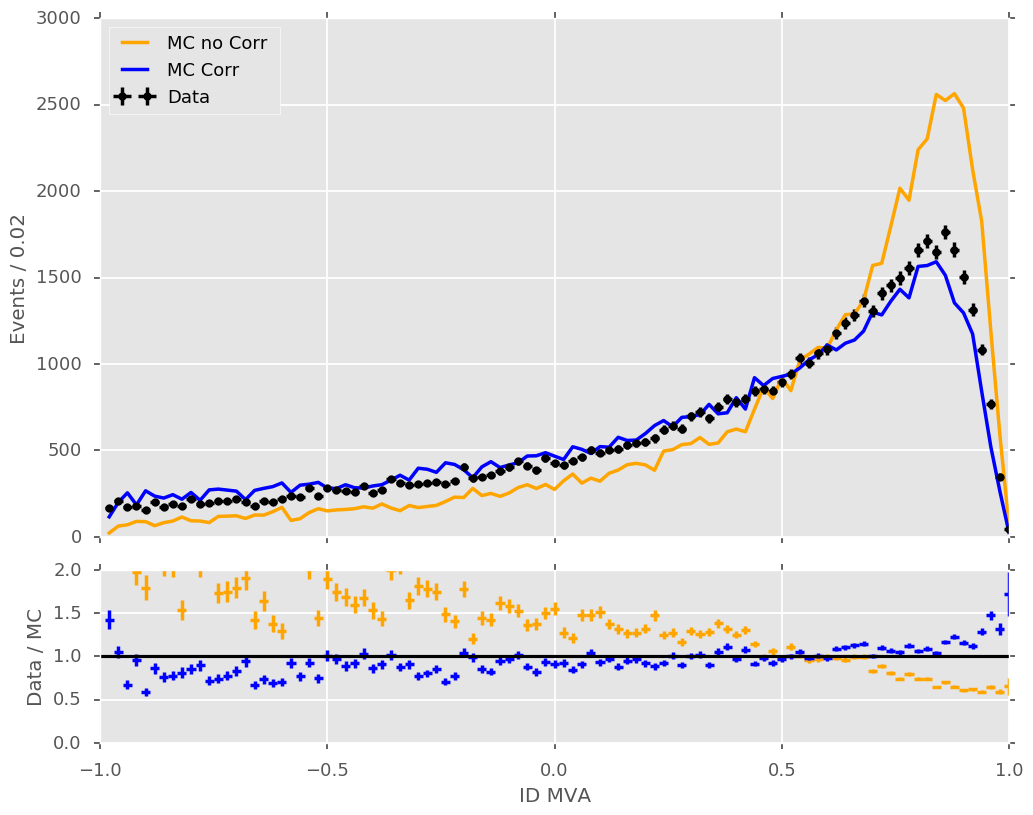

In [15]:
bins = np.linspace(-1,1,101)
var = 'moriondPhoID'
mclabels = [ '', 'corrShowerShapes']
mcstyles = [ dict(label='MC no Corr ',color='orange'),
             dict(label='MC Corr ',color='blue'), 
           ]

for dfs in [ (dfEB,dfmcEB), (dfEE,dfmcEE) ]: 
    data, mc = plot.data_mc(dfs[0],dfs[1],var,bins,weight="weight",mclabels=mclabels)
    plot.draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8))
  

In [16]:
import matplotlib as mpl
from functools import reduce
mpl.rcParams['figure.figsize'] = (8,8)

mpl.rc('xtick', labelsize=40) 
mpl.rc('ytick', labelsize=20) 
mpl.rc('lines', linewidth=2)
mpl.rc('axes', linewidth=2)

def set_style(obj,color):
    obj.set_color(color)
    obj.set_linewidth(2)
    
def do_boxplot(df,column,by,color,ax):
    objs = df.query('%s > -0.8' % column).boxplot(column=column,by=by, return_type='dict', ax=ax)
    map(lambda x: set_style(x,color), reduce(lambda x,y: x+y, objs[column].values()))

def do_var_boxplot(df,cut,column,by,color,ax):
    objs = df.query(cut).boxplot(column=column,by=by, return_type='dict', ax=ax)
    map(lambda x: set_style(x,color), reduce(lambda x,y: x+y, objs[column].values()))

In [17]:
binsEta = np.linspace(-2.5,2.5, 21)

dfmc['etaBin'] = pd.cut(dfmc.ScEta,binsEta)
dfdata['etaBin'] = pd.cut(dfdata.ScEta,binsEta)

binsPt = np.linspace(20,80,21)

dfmc['ptBin'] = pd.cut(dfmc.Pt,binsPt)
dfdata['ptBin'] = pd.cut(dfdata.Pt,binsPt)

dfmcEB['ptBin'] = pd.cut(dfmcEB.Pt,binsPt)
dfEB['ptBin'] = pd.cut(dfEB.Pt,binsPt)

dfmcEE['ptBin'] = pd.cut(dfmcEE.Pt,binsPt)
dfEE['ptBin'] = pd.cut(dfEE.Pt,binsPt)

binsRho = np.linspace(0,25,26)

dfmc['rhoBin'] = pd.cut(dfmc.rho,binsRho)
dfdata['rhoBin'] = pd.cut(dfdata.rho,binsRho)

dfmcEB['rhoBin'] = pd.cut(dfmcEB.rho,binsRho)
dfEB['rhoBin'] = pd.cut(dfEB.rho,binsRho)

dfmcEE['rhoBin'] = pd.cut(dfmcEE.rho,binsRho)
dfEE['rhoBin'] = pd.cut(dfEE.rho,binsRho)



/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

/swshare/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


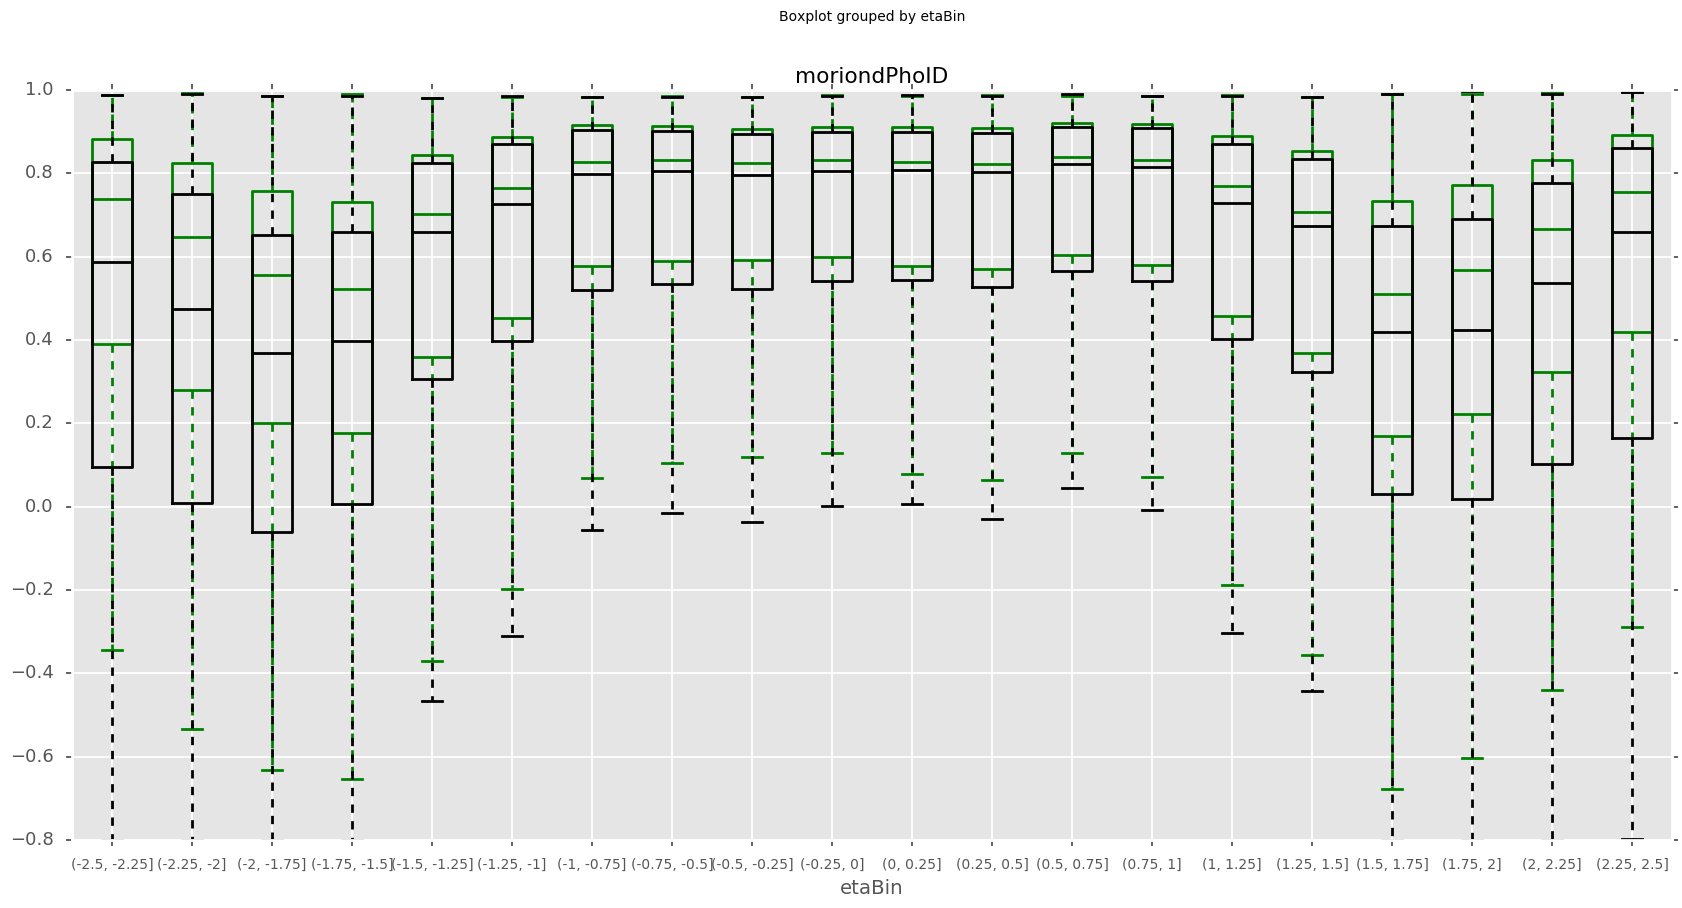

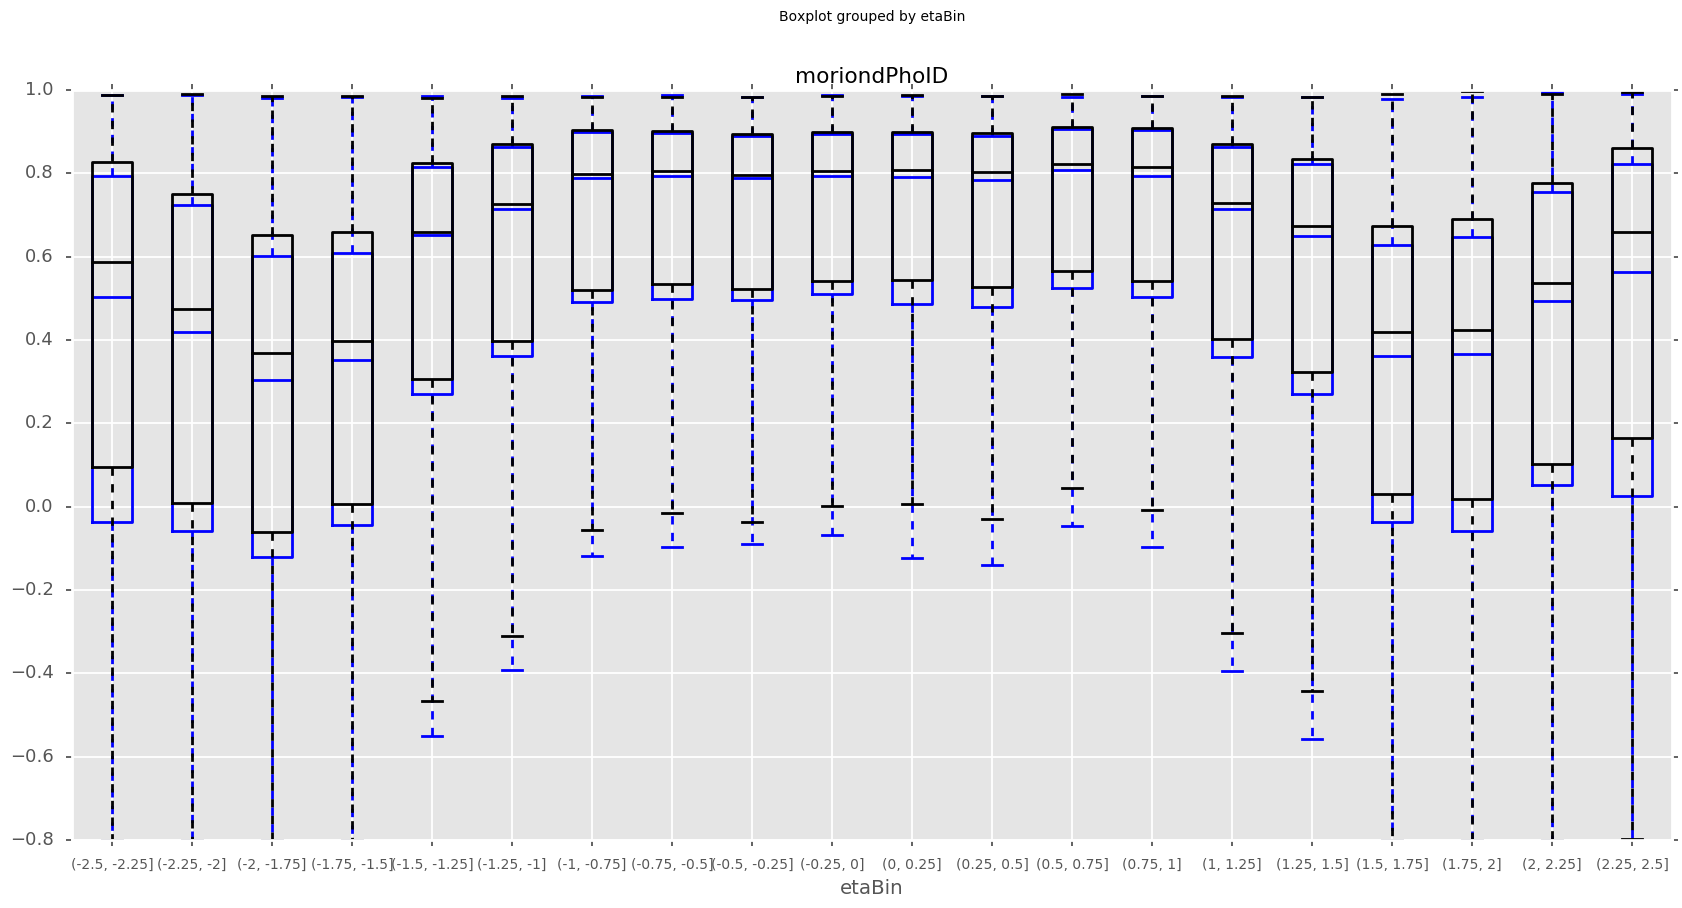

In [20]:
%matplotlib inline
plt.style.use('seaborn-talk')

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmc,'moriondPhoID', 'etaBin', 'green', ax)
do_boxplot(dfdata,'moriondPhoID', 'etaBin', 'black', ax)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmc,'moriondPhoIDcorrShowerShapes', 'etaBin', 'blue', ax)
do_boxplot(dfdata,'moriondPhoID', 'etaBin', 'black', ax)

fig.show()

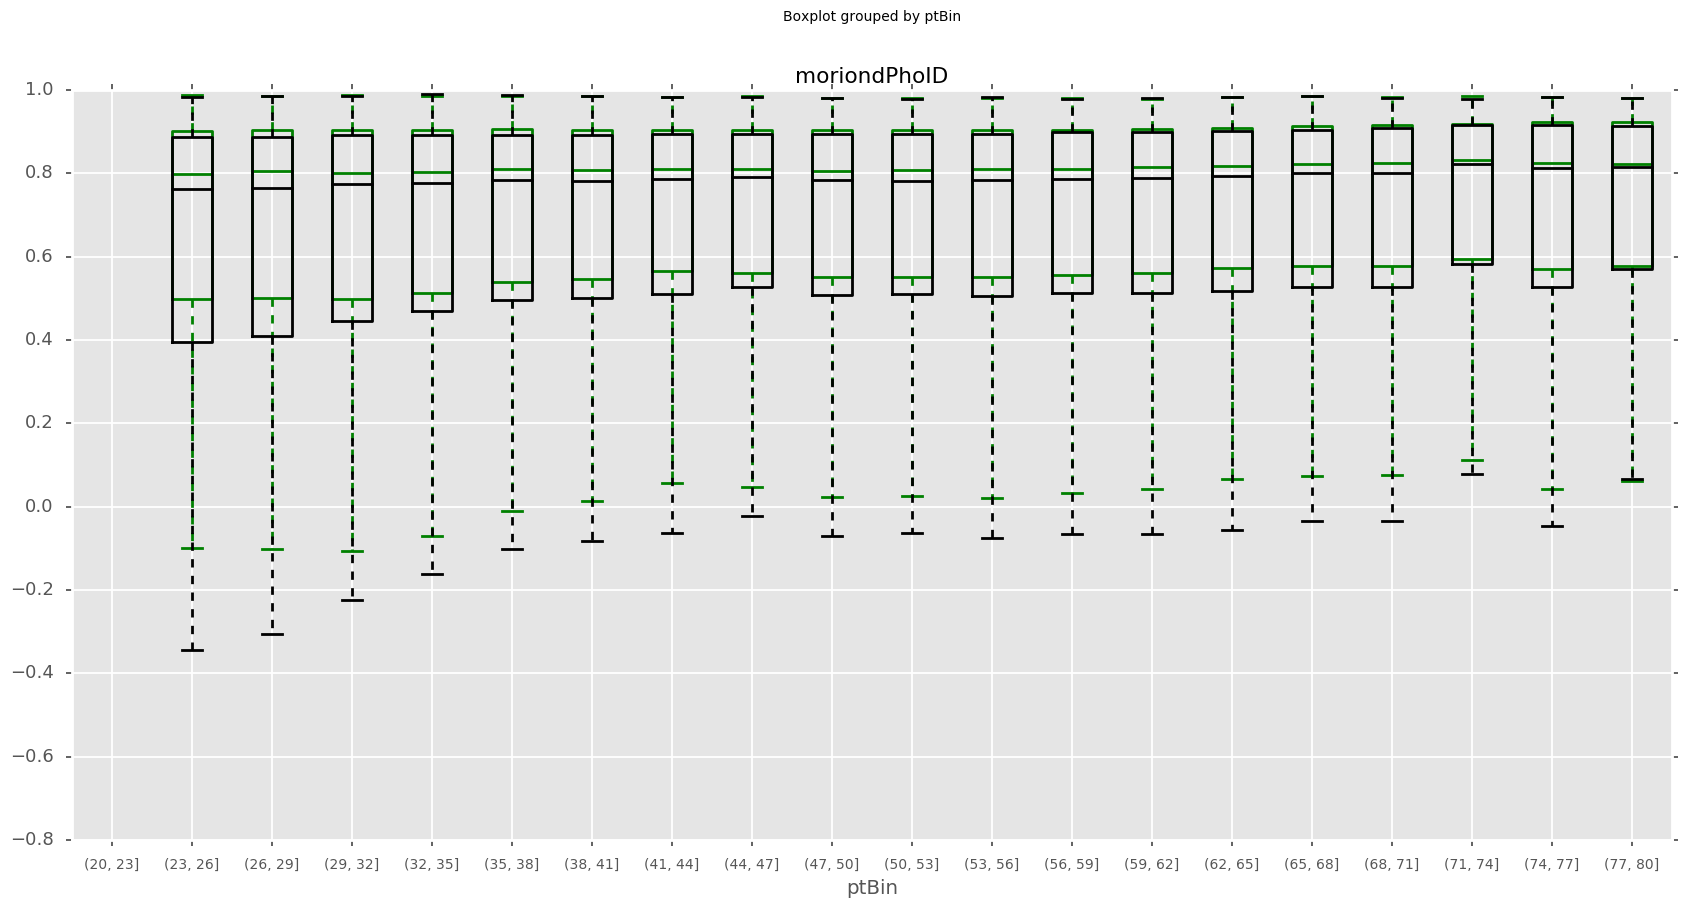

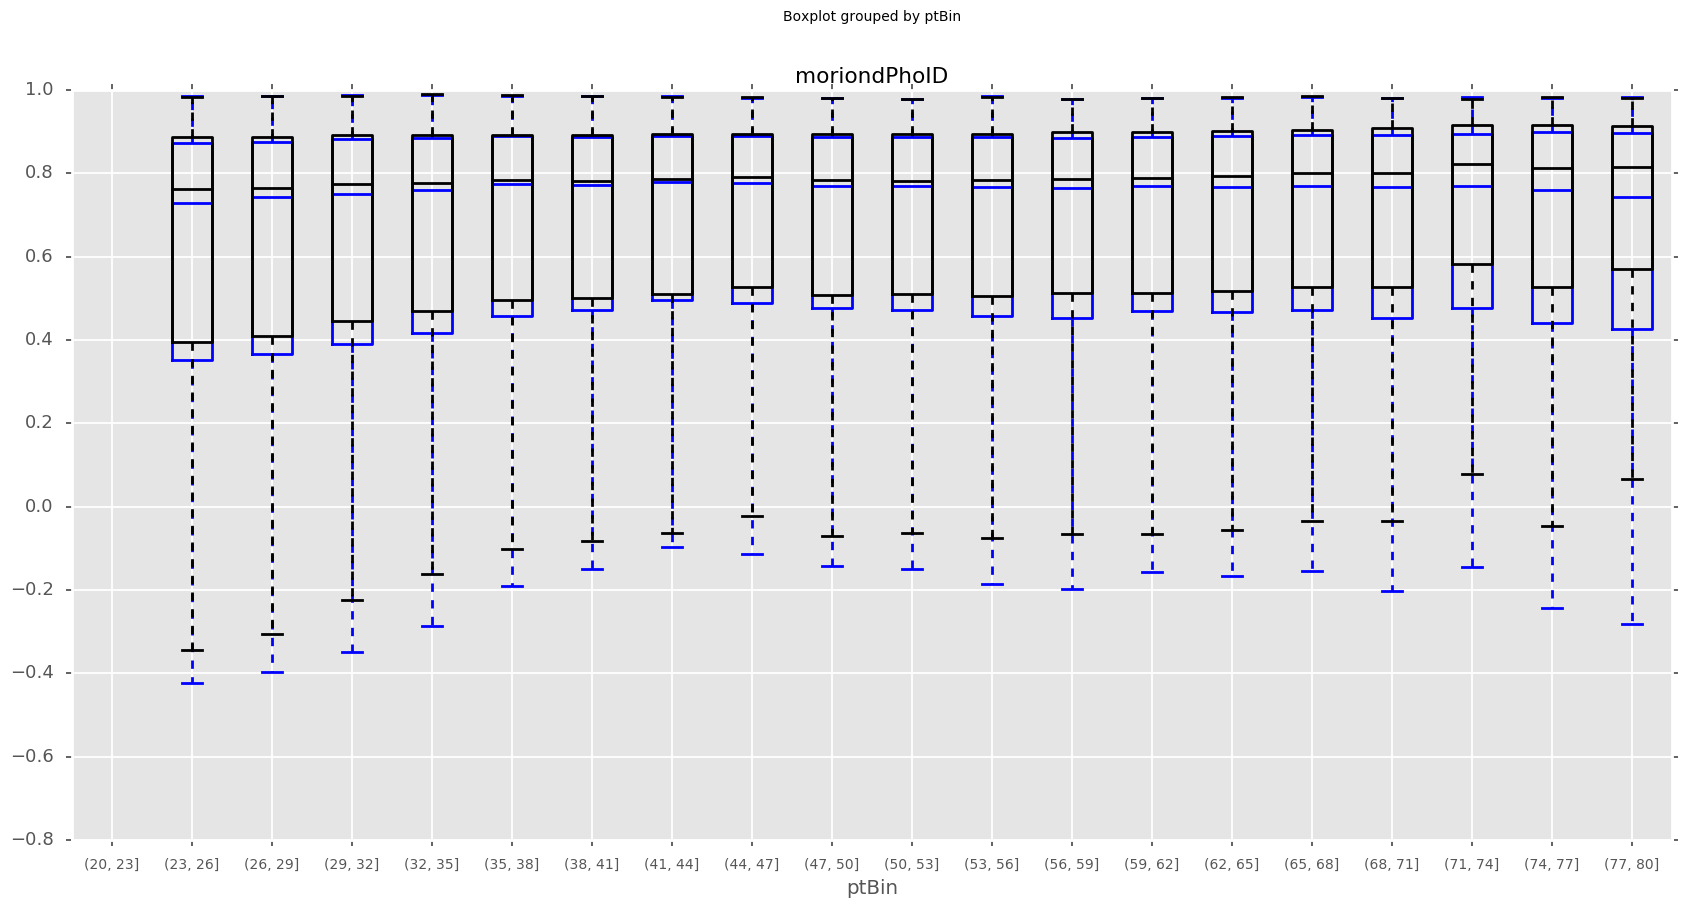

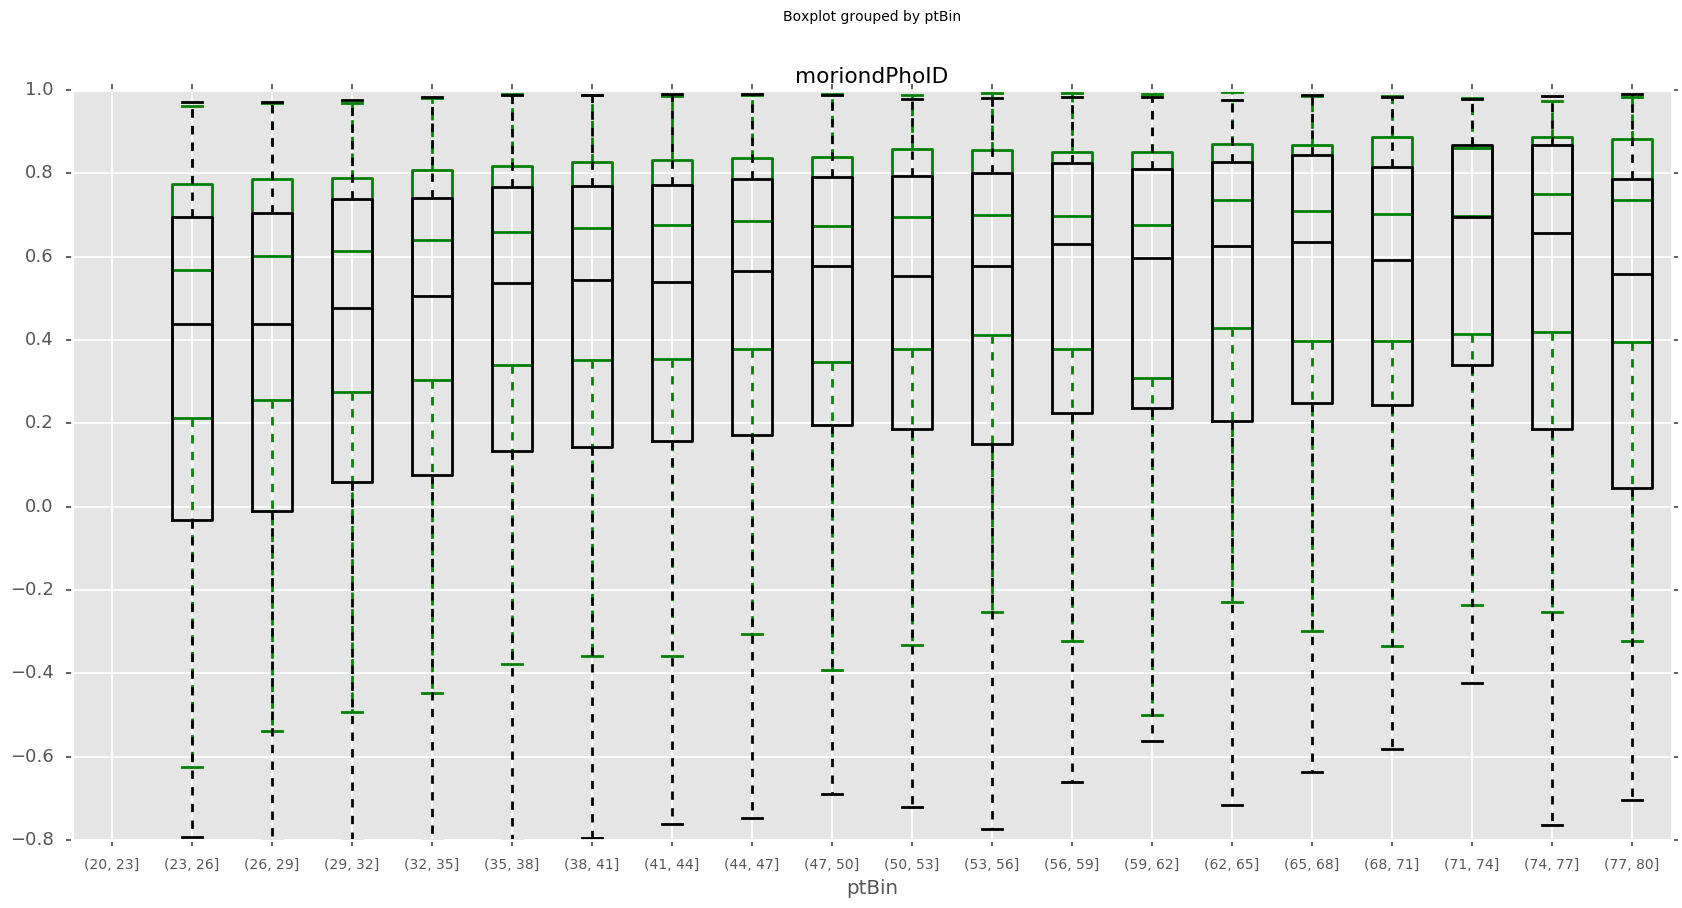

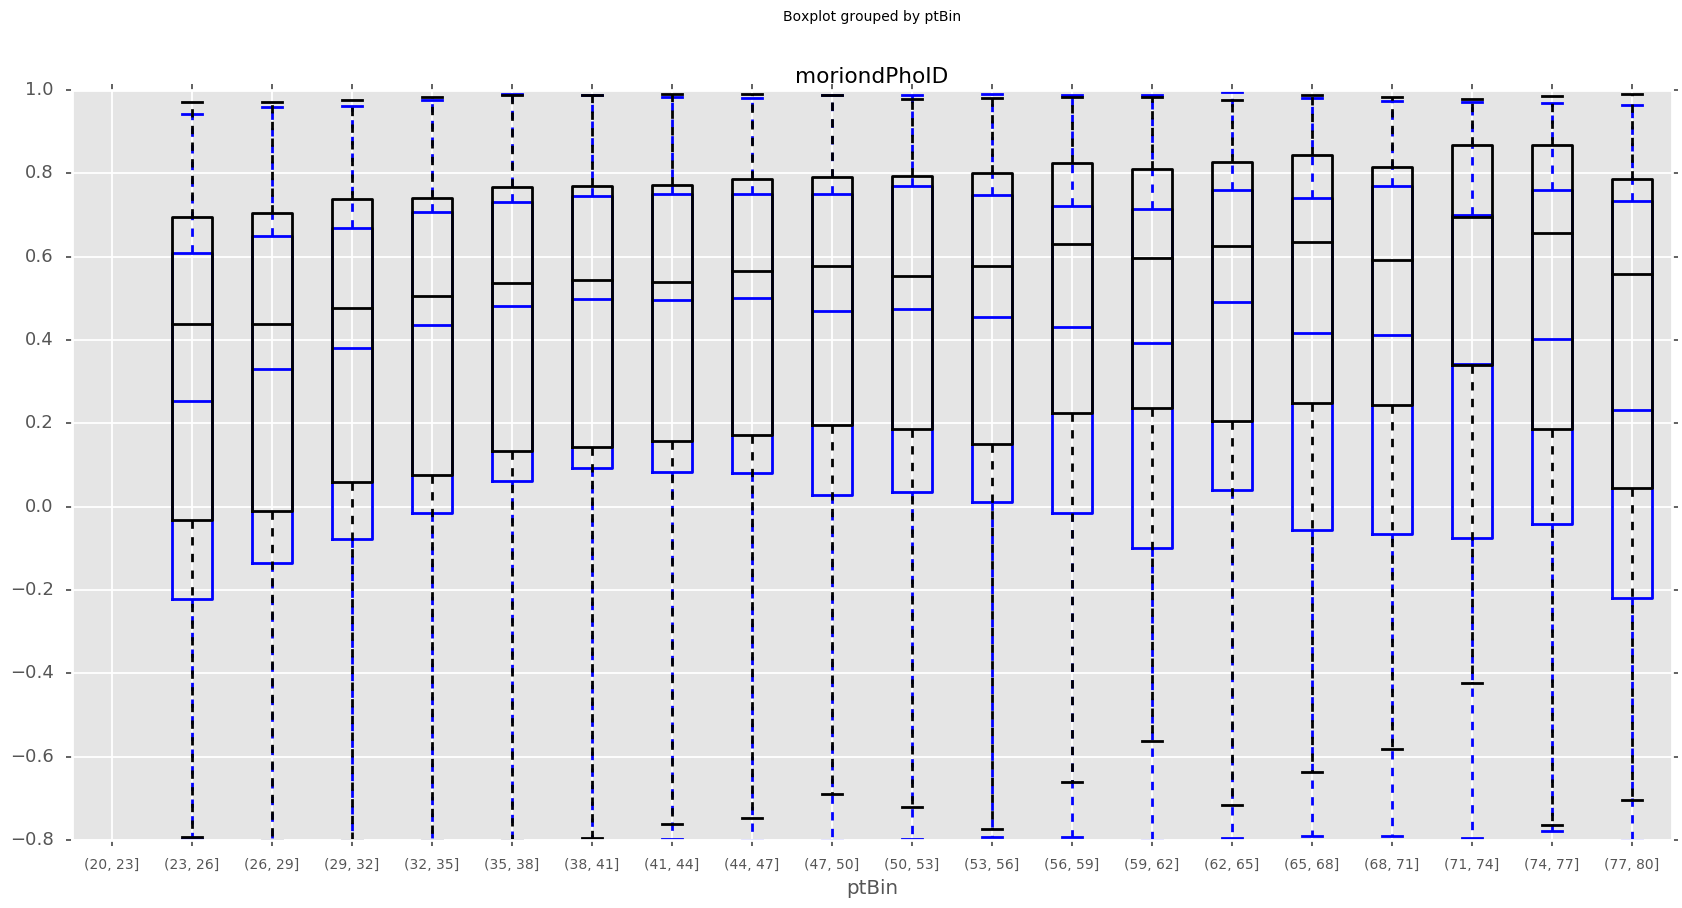

In [21]:


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEB,'moriondPhoID', 'ptBin', 'green', ax)
do_boxplot(dfEB,'moriondPhoID', 'ptBin', 'black', ax)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEB,'moriondPhoIDcorrShowerShapes', 'ptBin', 'blue', ax)
do_boxplot(dfEB,'moriondPhoID', 'ptBin', 'black', ax)


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEE,'moriondPhoID', 'ptBin', 'green', ax)
do_boxplot(dfEE,'moriondPhoID', 'ptBin', 'black', ax)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEE,'moriondPhoIDcorrShowerShapes', 'ptBin', 'blue', ax)
do_boxplot(dfEE,'moriondPhoID', 'ptBin', 'black', ax)

# dfmc.boxplot(column='moriondPhoIDcorr',by='etaBin', return_type='dict', ax=ax, color='blue')

In [ ]:
dfm=dfmcEB
dfd=dfEB
xvar="Pt"
yvar="moriondPhoID"
xmin,xmax=20.0,80.0
minY=-1
maxY=1
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
ax.set_xlabel(xvar)
ax.set_ylabel(yvar)
ax.set_xlim(xmin,xmax)
ax.set_ylim(minY,maxY)
plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
plot.Profile(dfm[xvar]  , dfm[yvar+'corrAll']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])

        

In [ ]:
dfm=dfmcEE
dfd=dfEE
xvar="Pt"
yvar="moriondPhoID"
xmin,xmax=20.0,80.0
minY=-1
maxY=1
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
ax.set_xlabel(xvar)
ax.set_ylabel(yvar)
ax.set_xlim(xmin,xmax)
ax.set_ylim(minY,maxY)
plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
plot.Profile(dfm[xvar]  , dfm[yvar+'corrAll']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])

        